In [1]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

In [2]:
# Reading the data file

df=pd.read_csv("datafile1.csv")

In [3]:
df.head(5)


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016


**Displays the first 5 rows of the dataset**

In [4]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

**df.dtypes provides the datatype of the columns listed in the datatype. Many datatypes are either integer or float. Few datatypes which are not identifiable are seen as Object, this contains string values and needs to be converted into Pythin identifiable type.**

In [5]:
rows = df.shape[0]
columns = df.shape[1]
print("Rows =", rows, "\nColumns =", columns)

Rows = 209593 
Columns = 37


**Shows the number of rows and columns present in our dataset. It contains 209593 rows and 37 columns**

In [6]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no null values in the dataset

In [7]:
df.columns.values

array(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30',
       'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback30', 'payback90', 'pcircle', 'pdate'], dtype=object)

**This particular function provides the names of the columns that are listed in our dataset**

# Multi-Variant Analysis

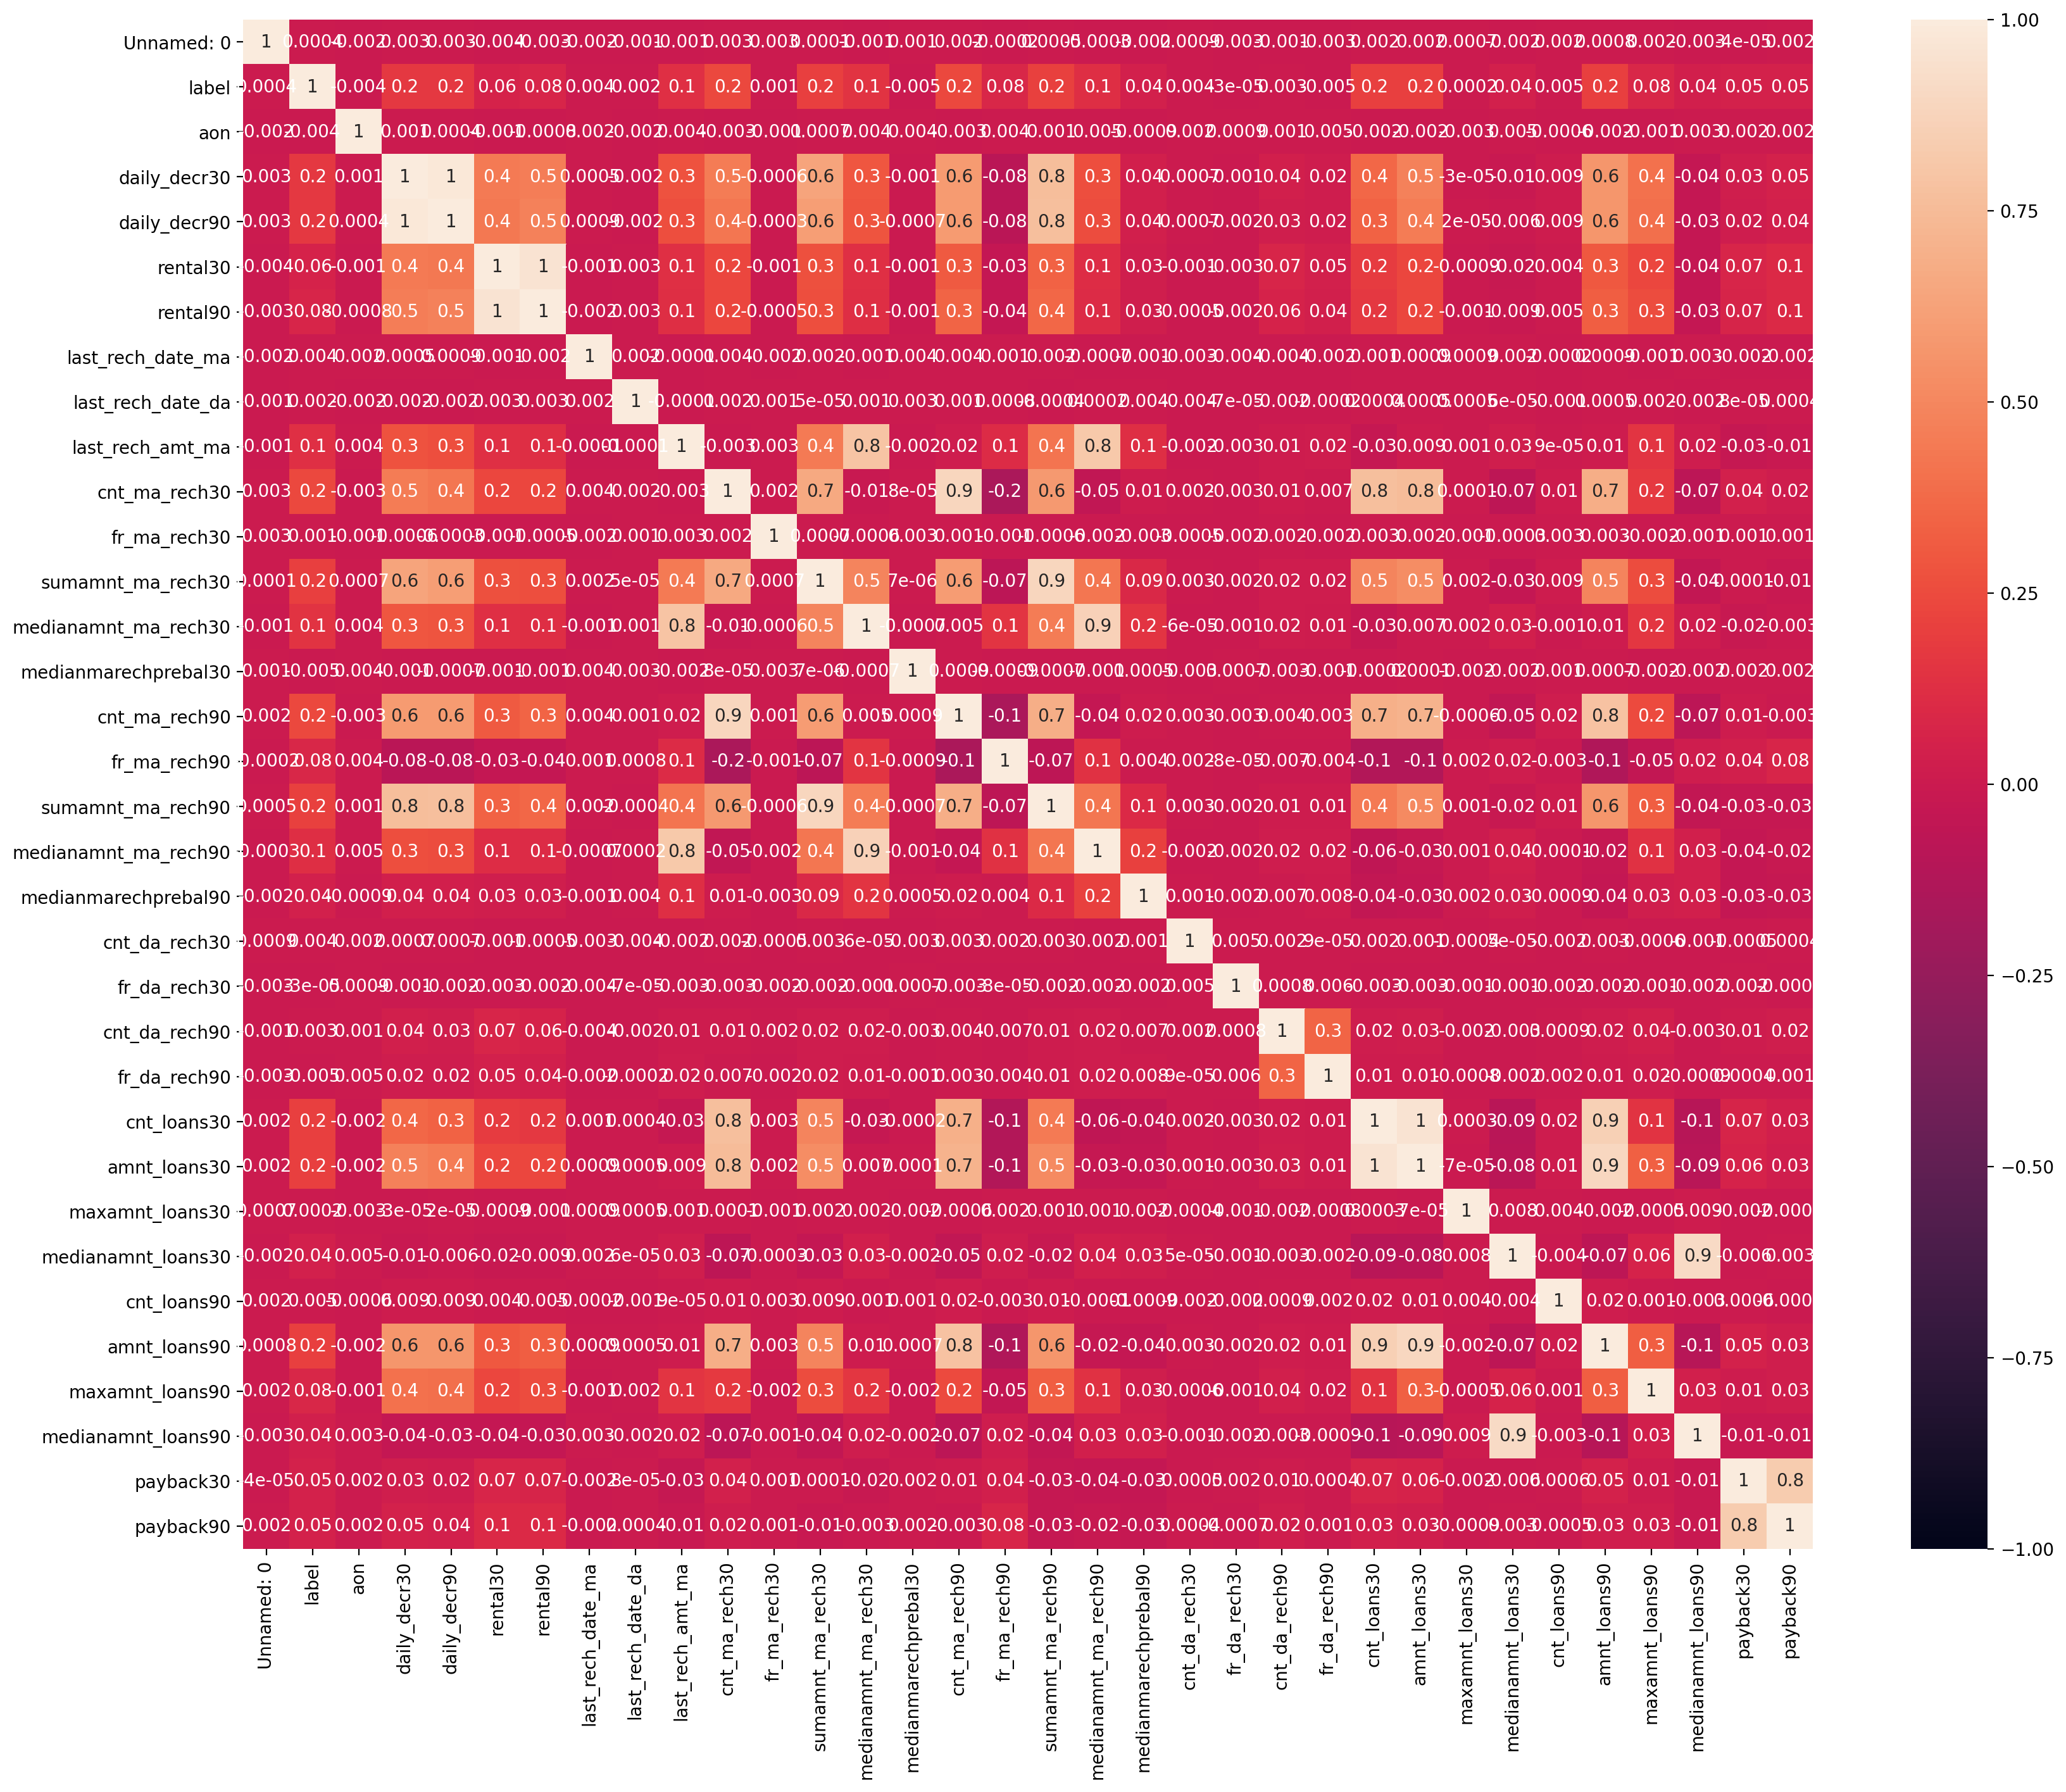

In [8]:
plt.figure(figsize=(20,16),dpi=200)
sns.heatmap(df.corr(),annot=True,fmt='.1g',vmax=1,vmin=-1)

**From this heatmap we have got the correlation values and we can see that the column "daily_decr30", "daily_decr90", "cnt_ma_rech30", "sumamnt_ma_rech30", "cnt_loans30", "amnt_loans30" and "amnt_loans90"**
**has high positive correlation with the target column "label" compared to all other columns**
**So as these values are higher, the probability of paying loan is higher**


In [9]:
df=df.drop(['Unnamed: 0','pcircle','msisdn','aon'],axis=1)

**The above columns are not very much necessary for our predictions, Hence dropping them**

In [10]:
cat_f, num_f = [], []
for i in df:
    if df[i].dtypes=='object':
        cat_f.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_f.append(i)
    else: print('Other >', i)
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_f))
print('>>> Number of Numerical Features ::', len(num_f))

>>> Total Number of Features :: 33
>>> Number of Categorical Features :: 1
>>> Number of Numerical Features :: 32


**Numerical features and categorical features are stored separately**

# Uni-Variant Analysis

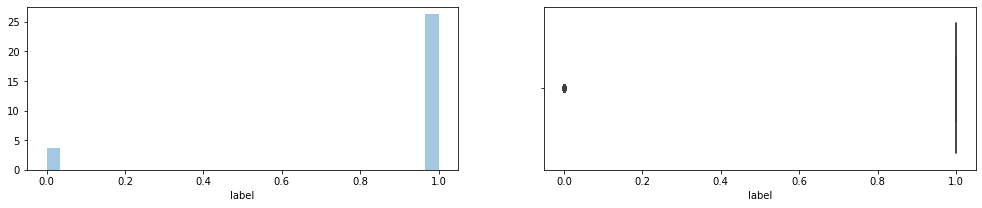

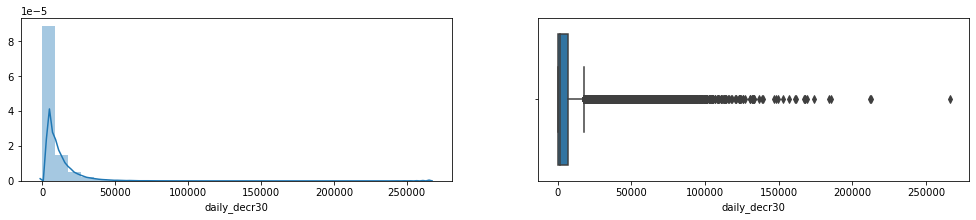

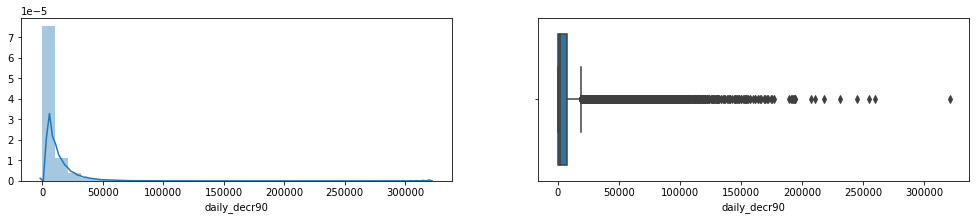

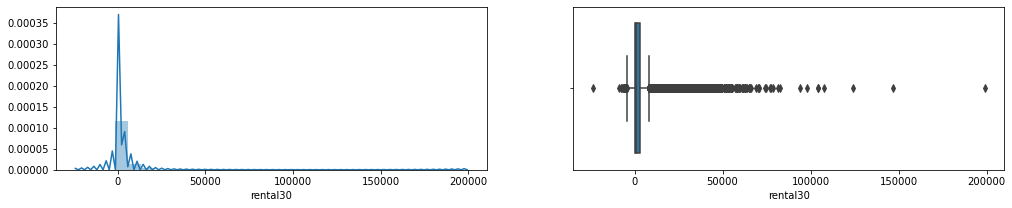

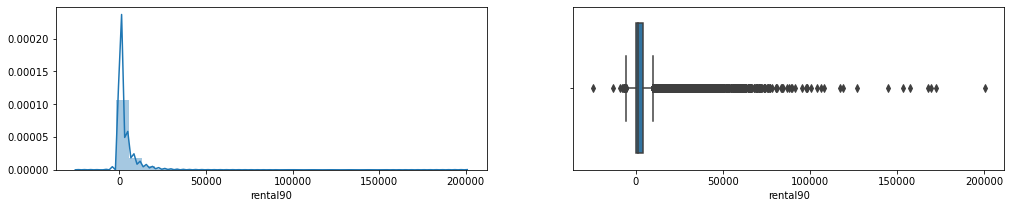

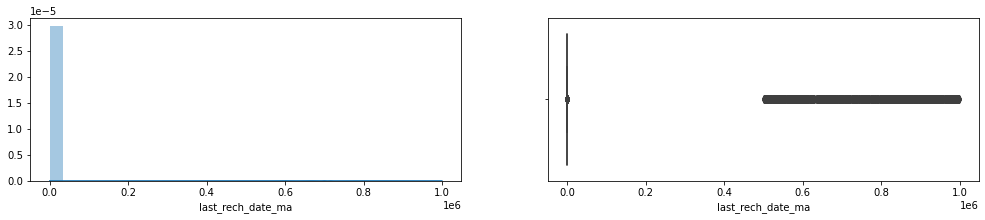

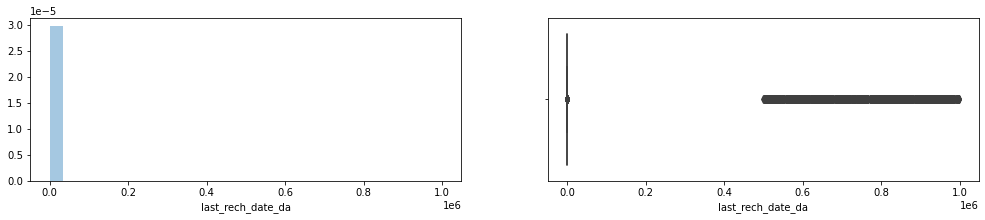

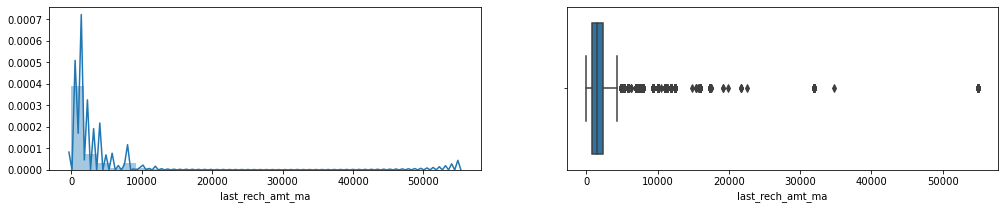

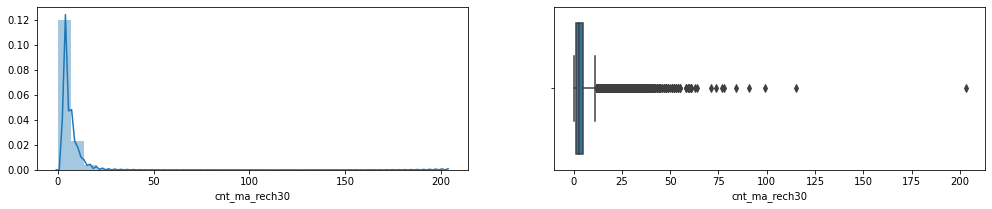

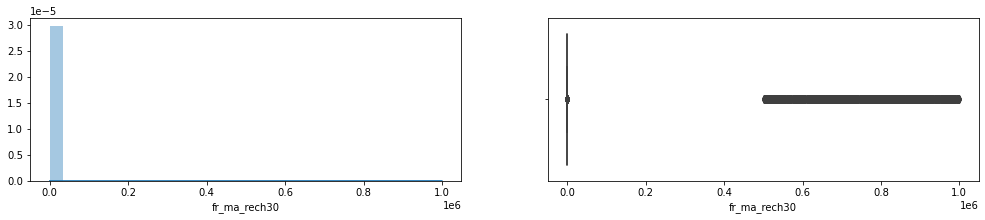

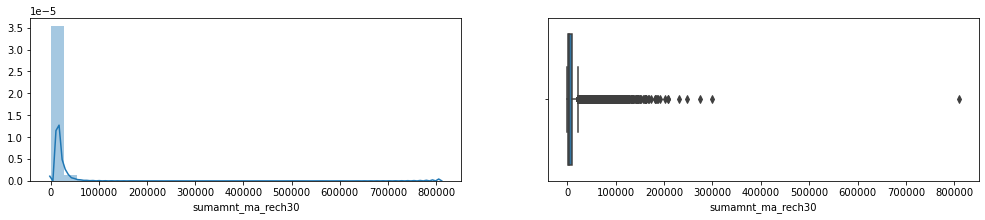

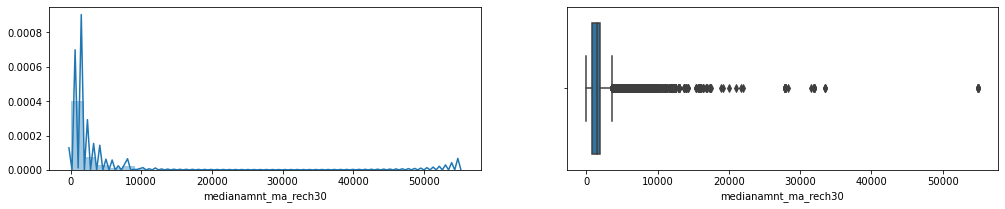

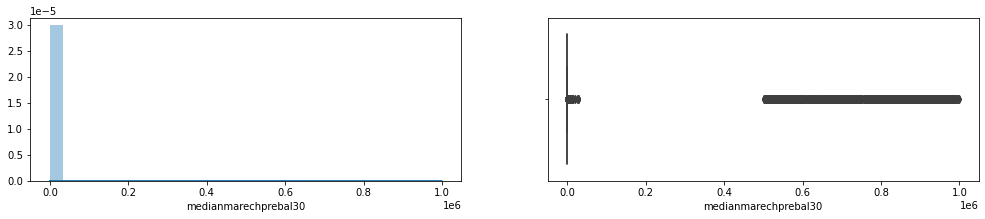

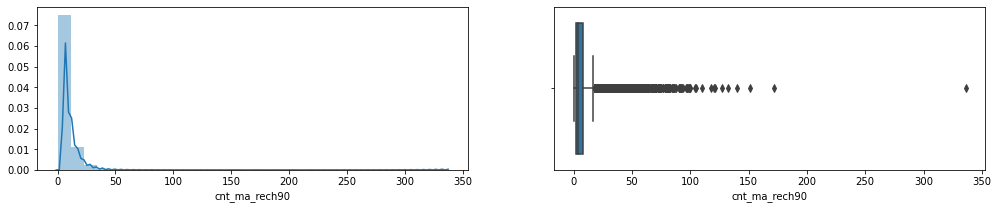

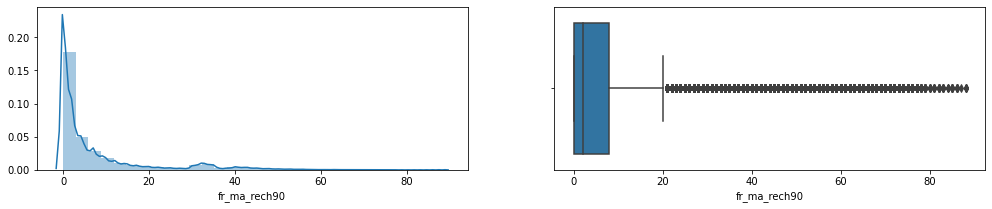

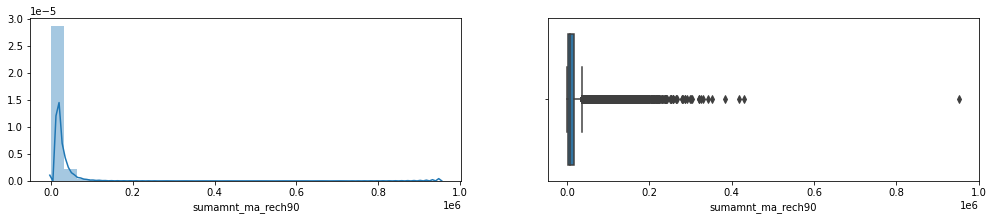

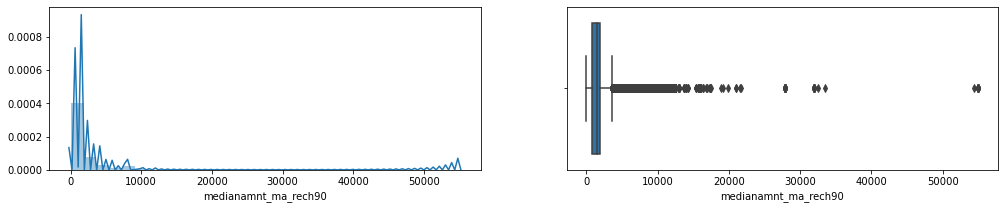

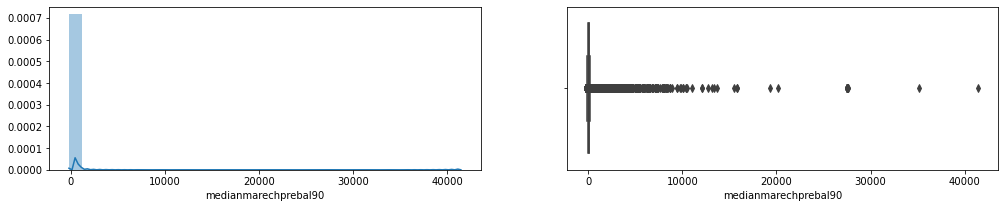

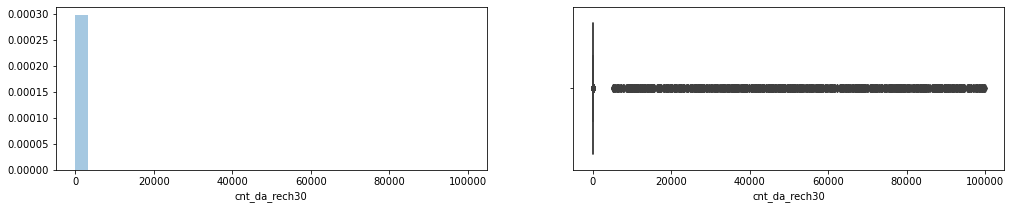

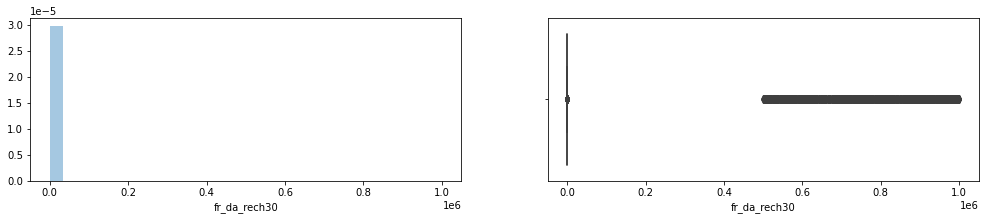

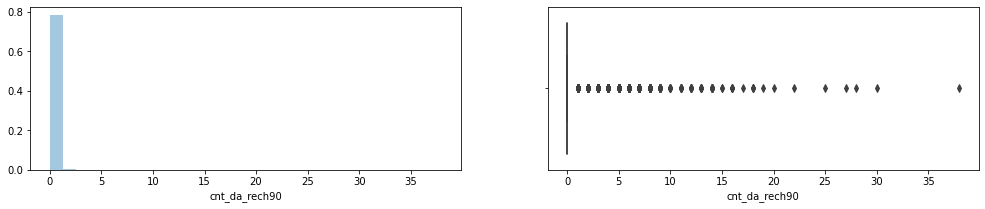

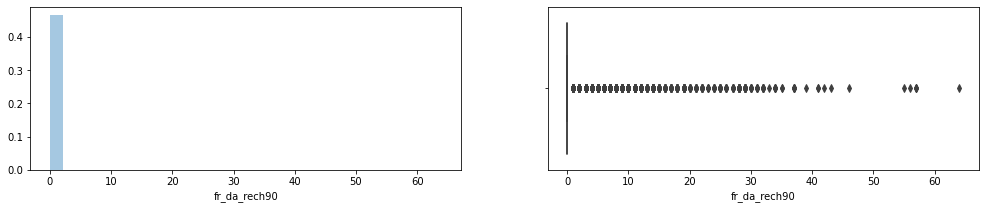

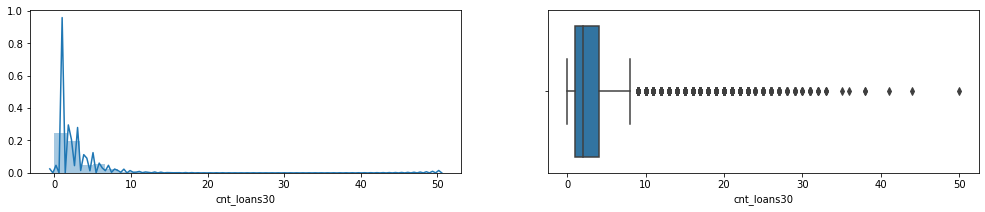

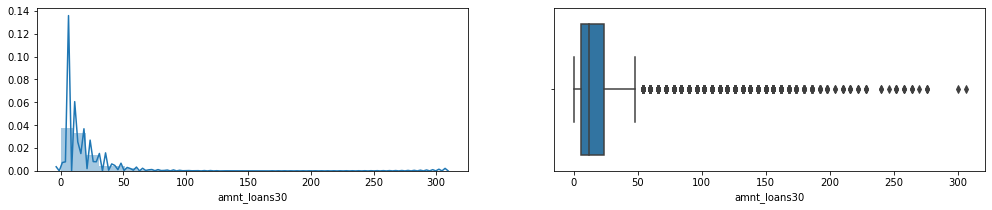

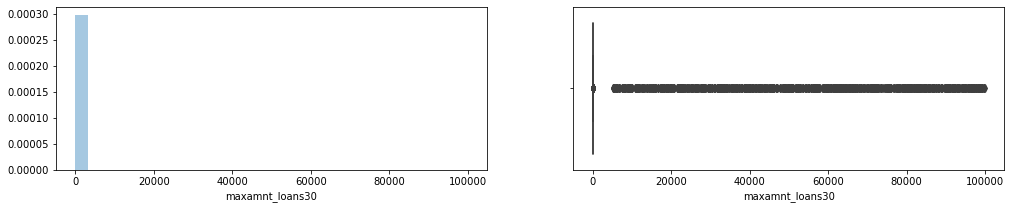

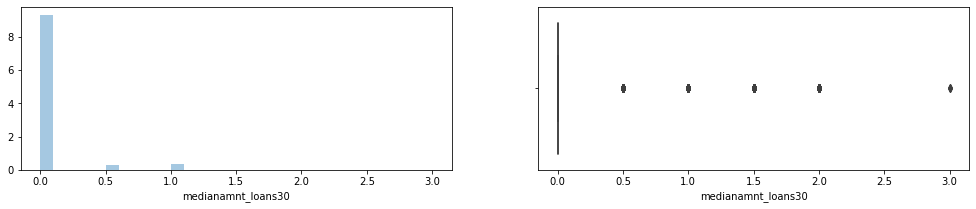

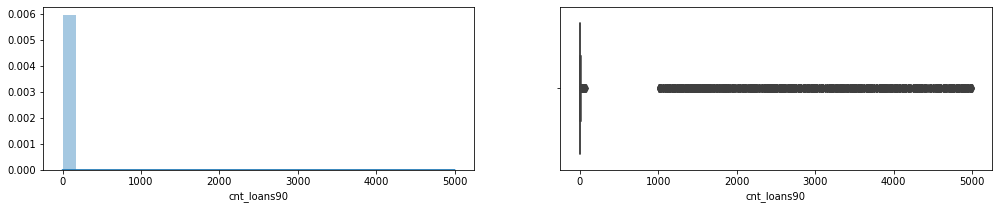

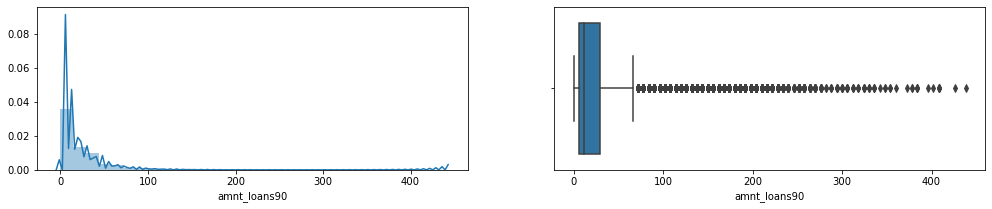

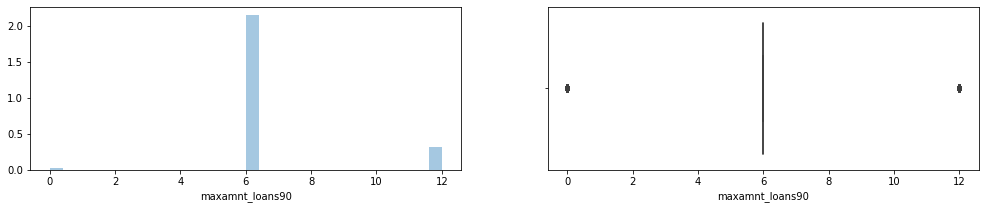

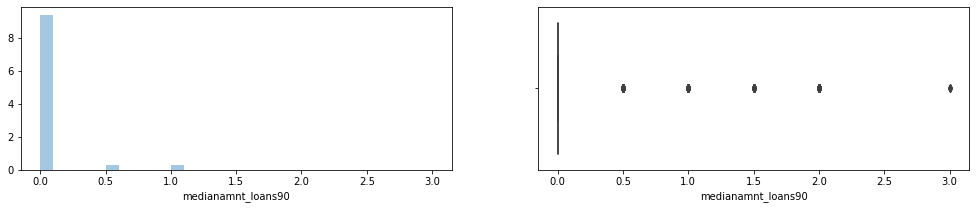

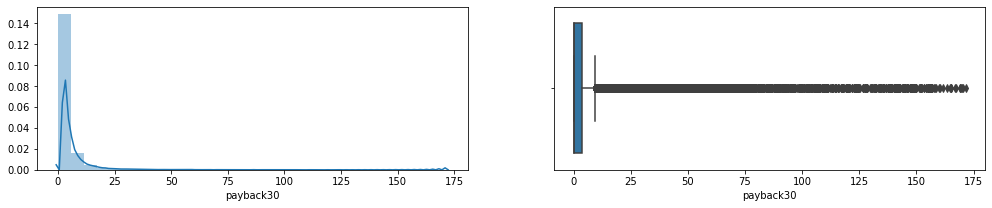

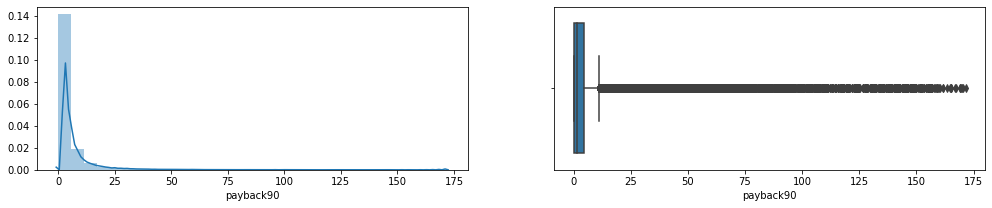

In [11]:
#Univariate analysis for num_df

skewness, skew_name = [], []
for i in num_f:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    skewness.append(round(df[i].skew(),2))
    skew_name.append(i)

**We see the distribution of values and also the presence of outliers for our numerical features**

In [12]:
skew_df = pd.DataFrame(skewness, index=[skew_name], columns=['Skewness']).sort_values(by='Skewness', ascending=False)
skew_df[skew_df['Skewness'] > 0.55]

,Skewness
medianmarechprebal90,44.88
fr_da_rech90,28.99
cnt_da_rech90,27.27
cnt_da_rech30,17.82
maxamnt_loans30,17.66
cnt_loans90,16.59
last_rech_date_da,14.81
last_rech_date_ma,14.79
medianmarechprebal30,14.78
fr_da_rech30,14.78


In [13]:
df=df.drop(['pdate'],axis=1)

In [14]:
# Separating the features 

X = df.drop('label', axis=1)
y = df['label']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Scaling the data

In [17]:
ss = StandardScaler()
scaled_X_train = ss.fit_transform(X_train)
scaled_X_test=ss.transform(X_test)

# Machine Learning Models

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Instantiate all models
logr = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()


In [20]:
models={'Logistic Regression':logr,
        'Support Vector Machine':svc,
        'KNeighbors Classifier':knn,
        'Decision Tree Classifier':dtc,
        'Random Forest Classifier':rf
       }

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, plot_confusion_matrix,plot_roc_curve

In [22]:
def main(cls):
    acc_scores=[]
    for model_name,model in cls.items():
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        score=accuracy_score(y_test,y_pred)
        acc_scores.append(score*100)
        print('##############################',model_name,'##############################')
        print('>>> Accuracy Score = %0.2f' %(score*100))
        c_matrix=confusion_matrix(y_test,y_pred)
        print('>>> Confusion Matrix: \n',c_matrix)
        TN,FP,FN,TP=c_matrix[0,0],c_matrix[0,1],c_matrix[1,0],c_matrix[1,1]
        print('>>> Recall Score = %0.2f' %((TP)*100/float(TP+FN)))
        print('>>> Specificity = %0.2f' %(TN*100/float(TN+FP)))
        print('>>> False Positive Rate = %0.2f' %(FP*100/float(FP+TN)))
        print('>>> Precision Score = %0.2f' %(TP*100/float(TP+FP)))
        print('>>> Classification Report:')
        print(classification_report(y_test,y_pred))
    return acc_scores

In [23]:
acc_scores=main(models)

############################## Logistic Regression ##############################
>>> Accuracy Score = 86.61
>>> Confusion Matrix: 
 [[ 1562  6346]
 [ 2076 52894]]
>>> Recall Score = 96.22
>>> Specificity = 19.75
>>> False Positive Rate = 80.25
>>> Precision Score = 89.29
>>> Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.20      0.27      7908
           1       0.89      0.96      0.93     54970

    accuracy                           0.87     62878
   macro avg       0.66      0.58      0.60     62878
weighted avg       0.83      0.87      0.84     62878

############################## Support Vector Machine ##############################
>>> Accuracy Score = 87.42
>>> Confusion Matrix: 
 [[    0  7908]
 [    0 54970]]
>>> Recall Score = 100.00
>>> Specificity = 0.00
>>> False Positive Rate = 100.00
>>> Precision Score = 87.42
>>> Classification Report:
              precision    recall  f1-score   support

           0  

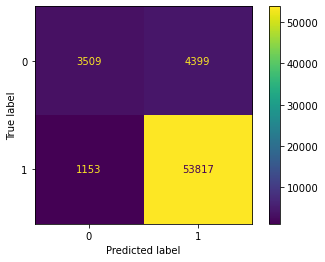

In [25]:

# Plotting Confusion Matrix

rf.fit(X_train,y_train)
plot_confusion_matrix(rf, X_test, y_test)

**AUC_ROC curve**

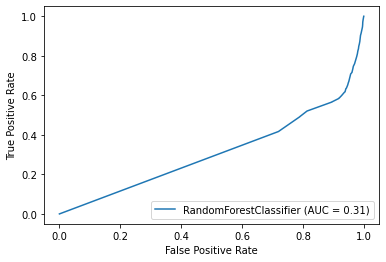

In [26]:
plot_roc_curve(rf,scaled_X_test,y_test)